In [49]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from mpl_toolkits.mplot3d import Axes3D

plt.style.use('ggplot') #Make the graphs pretty :) 

# Question 4 part b

In [2]:
# Simulate poisson distribution, and perform the Wald test:

v0 = 1 # the null-hypothesis' lambda
n = 20
a = 0.05 # alpha

def sim_pois():
    return np.random.poisson(v0, n)

# Compute W according to part a of this question:
def comp_W(x_arr):
    mean = np.mean(x_arr)
    W = ((math.sqrt(n))*(mean-v0))/float((math.sqrt(mean)))
    return W

# As we learned in class, when a = 0.05 : Z(a/2) = 1.96
z = 1.96

# Check if the null-hypothesis should be rejected:
def isRejectingNull(W):
    return (abs(W) > z)

# calculate the ratio of rejecting the null-hypothesis:
count = 0
x_arr = []
W = 0
for i in range(1,1000):
    x_arr = sim_pois()
    W = comp_W(x_arr)
    if (isRejectingNull(W)):
        count += 1

ratio = count / float(1000)

print "The type 1 error rate is:", ratio
    

The type 1 error rate is: 0.052


**We generated the samples with the null-hypothesis' lambda, so the null-hypothesis is always true.
For that reason, the type 1 error rate equals the ratio of rejecting the null-hypothesis according to the test.
After repeating the test 1000 times, we can see that the type 1 error rate is indeed very close to alpha.**


# Wet Part (Question 6)

In [3]:
#Load data:

df = pd.DataFrame.from_csv('sonar.all-data',index_col=None)
#Create columns list. EB stands for Energy band
cols = ['EB'+str(i) for i in range(1,len(df.columns))] + ['Class']
df.columns = cols

# Part B. data description:


The data contains patterns of sonar projected upon cylindircal rocks, and cylndrical metal objects.
The data includes 207 samples, and 60 features. Each feature represents the energy in a different energy band, each row represents a different experiment (measurement - the sonar returned from the object). The data also includes the class (rock vs metal) for each experiment.

In [4]:
#General stats of the data:
df.describe().loc[['mean','std','max']]


,EB1,EB2,EB3,EB4,EB5,EB6,EB7,EB8,EB9,EB10,...,EB51,EB52,EB53,EB54,EB55,EB56,EB57,EB58,EB59,EB60
mean,0.029208,0.038443,0.043837,0.054053,0.075105,0.104599,0.121591,0.134677,0.177361,0.208245,...,0.016034,0.013472,0.010729,0.010917,0.009300,0.008181,0.007771,0.007947,0.007936,0.006523
std,0.023038,0.033040,0.038521,0.046583,0.055669,0.059247,0.061897,0.085340,0.118311,0.134741,...,0.012027,0.009628,0.007071,0.007310,0.007103,0.005719,0.005756,0.006485,0.006196,0.005038
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


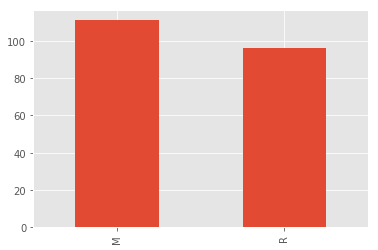

In [5]:
#Labels distribution
sr = df['Class']

sr.value_counts().plot(kind='bar')


As we can see, there is a simillar number of samples of each class (R/M). Approximately 90~ each (there are slightly more samples of metal).

**Statistics of each class:**

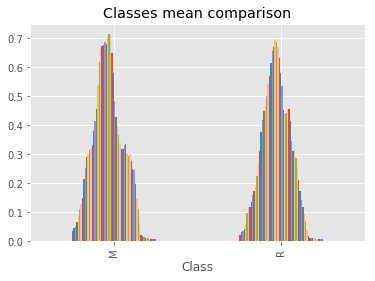

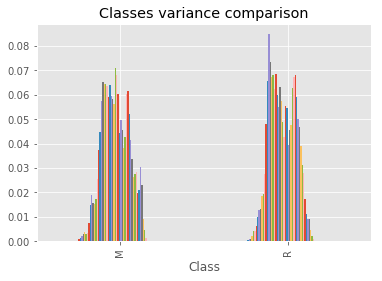

In [6]:
classDf =  df.groupby('Class')
classDf.mean().plot(kind='bar',legend=False,title='Classes mean comparison')
classDf.var().plot(kind='bar',legend=False,title='Classes variance comparison')


As we can see, it seems that the average is simillar between the classes, but the variance shows higher difference.

# Part C: Compute the PCA
**We shall use simillar methods to those we've seen in the tutorial.
For efficiancy purposes, we will compute the eigenvectors/values by ourselves (as we would need a different number of them each iteration). 

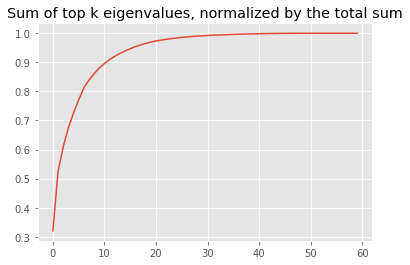

In [7]:
#Substract means, and calc cov matrix.
#From the recitation:

X = df.iloc[:,:-1].values
X = X.T
mean_vec = np.mean(X, axis=1)
X_zero_mean = (X.T-mean_vec).T

cov_mat = X_zero_mean.dot(X_zero_mean.T) / (X.shape[1]-1)

#Calculate eigenvalues/vectors, and sort them in decreasing order.

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(reverse=True)


#Let us recall that the sum of eigenvalues is the variance. 
#Hence, lets visualize the ratio between the eigenvlaues: 
tot = sum(eig_vals)
var_exp = [(i / tot) for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
plt.plot(cum_var_exp) 
plt.title('Sum of top k eigenvalues, normalized by the total sum')
plt.show()



**As we can see, after approximately the top 25 eigenvlaues, the contribution of the remaining becomes almost insignificant. Let us demonstrate it with the gradient as well:**

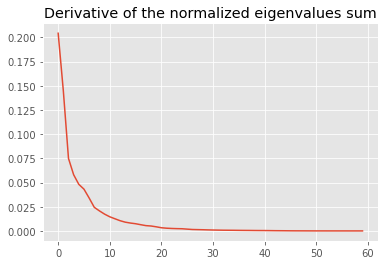

In [8]:
cumSumGradient = np.gradient(cum_var_exp)
plt.plot(cumSumGradient)
plt.title('Derivative of the normalized eigenvalues sum')

plt.show()

**As we can see, the derivative tends towards 0, hence no significant contribution to the total sum/variance**

In [9]:
#Now, after we've computed the eigenvectors and values, let us project our data into 2/3 dimentional subspace.
W2d = eig_vecs[:,0:2]
W3d = eig_vecs[:,0:3]

#After we've calculated the transformation matrices, let us compute the projected data.

X2d = W2d.T.dot(X)
X3d = W3d.T.dot(X)

#As expected, the new shapes of X are (dim,No* of samples) - in our case (2/3,207)
print ('The dimentions of X2d are: {}. The dimensions of X3d are: {}'.format(X2d.shape,X3d.shape))




The dimentions of X2d are: (2L, 207L). The dimensions of X3d are: (3L, 207L)


# Part D: visualization

(207L,) (207L,)


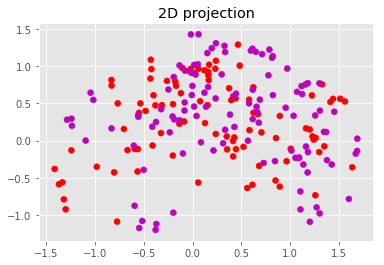

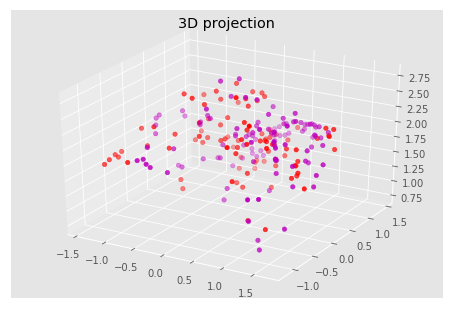

In [53]:
#Create 2d and 3d scatter plots.

W2d.shape
x =  X2d[0,:]
y =  X2d[1,:]
print x.shape,y.shape
df['Class']
# x_R = x[df[df['Class']=='R'].index.tolist()]
# x_M = x[df[df['Class']=='M'].index.tolist()]
# y_R = y[df[df['Class']=='R'].index.tolist()]
# y_M = y[df[df['Class']=='M'].index.tolist()]
plt.scatter(x,y,c=df['Class'])
plt.title('2D projection')


#Create 3d scatter plot:

fig = plt.figure()
ax = Axes3D(fig)
x =  X3d[0,:]
y =  X3d[1,:]
z =  X3d[2,:]

ax.scatter(x, y, z, c=df['Class'])
plt.title('3D projection')




# Part E: Compute the error curve

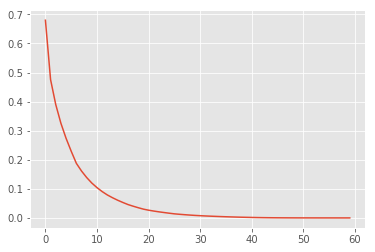

In [11]:
#Let us compute the reconstruction error:
X_norm = np.linalg.norm(X_zero_mean,ord='fro')
error = []
for i in range(len(eig_vals),0,-1):
    W = eig_vecs[:,0:i]
#     print(W)
    diff = ((np.linalg.pinv(W)).T).dot((W.T).dot(X_zero_mean))-X_zero_mean
    error.append(np.square(np.linalg.norm(diff,ord='fro')/X_norm))

error = error[::-1]

plt.plot(error)


**Simillarly to our conclusions from the eigenvalues graphs, here we can see that the error remains almost the same after about ~30 eigenvalues are being taken.**

# Part F: Determain how many vectors are required for sufficient reconstruction.

In [12]:
def getVecNum(errorArr,sucess): #Return the minimal number of eigen vectors, required for a certain error level.
    error = 1- sucess
    for idx,val in enumerate(errorArr):
        if val < error:
            return idx
        
    return None #No suitable value was found.

for i in [0.95,0.99]:
    print ('The number of vectors required for {} sucess rate is {} '.format(i,getVecNum(error,i)))

        

The number of vectors required for 0.95 sucess rate is 16 
The number of vectors required for 0.99 sucess rate is 28 
